## Exploratory Data Analysis on Unicorn Companies using Python

In [1]:
# import necesary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats

# for data visualization

import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
uc = pd.read_csv(r"C:\Users\arum chimdiebube\Downloads\Unicorn_Companies.csv")
uc.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## Data Cleaning

In [3]:
# Definea function to convert M and B to millions and Billions,respectively
def convert_to_number(x):
    if x[-1] == 'M':
        return float(x[:-1]) * 1e6
    elif x[-1] == 'B':
        return float(x[:-1]) * 1e9
    else:
        return x
    
# convert the valuation column to float
uc['Valuation'] = uc['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)

# convert the funding column to float
uc['Funding'] = uc['Funding'].replace('Unknown', '0').str.replace('$', '0').str.replace('M', '000000').str.replace('B', '000000000').apply(convert_to_number).astype(float)

# print the updated DataFrame
uc.head()                                                                                                                   
                                                                                                                   
                                                                                                            


C:\Users\arum chimdiebube\AppData\Local\Temp\ipykernel_9384\4116000005.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  uc['Valuation'] = uc['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)
C:\Users\arum chimdiebube\AppData\Local\Temp\ipykernel_9384\4116000005.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  uc['Funding'] = uc['Funding'].replace('Unknown', '0').str.replace('$', '0').str.replace('M', '000000').str.replace('B', '000000000').apply(convert_to_number).astype(float)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,12/1/2012,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,1/23/2014,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
uc.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [5]:
# convert Date Joined to datetime
uc['Date Joined'] = pd.to_datetime(uc['Date Joined'])

# convert Year Founded to datetime
uc['Year Founded'] = pd.to_datetime(uc['Year Founded'], format = '%Y')

In [6]:
uc.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded        datetime64[ns]
Funding                    float64
Select Investors            object
dtype: object

In [7]:
# calculate the age of the company at the time it joined unicorn companies
uc['Age of Joining'] = ((uc['Date Joined'] - uc['Year Founded']).dt.days / 365).round(1)

# print the updated DataFrame
uc.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [8]:
# apply the ffill method to CITY and 'SELECT INVESTORS' columns
uc['City'] = uc['City'].ffill()
uc['Select Investors'] = uc['Select Investors'].ffill()

# print the updated DataFrame
uc.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


## Unicorn Company Data Analysis and Visualization 

### No: 1. Which unicorn companies have had the biggest return on investment? 

In [9]:
# Filter the data to only include companies with known funding amounts
uc = uc[uc['Funding'].notnull()]

# Calculate the ROI for each company
uc['ROI'] = uc['Valuation'] / uc['Funding']

# Sort the companies by ROI and get the top 10
top_10_roi_companies = uc.sort_values(by='ROI', ascending=False).head(10)

# Print the result
print("Top 10 Unicorn Companies with the biggest return on investment and their funding value:")
for i, row in top_10_roi_companies.iterrows():
    print(f"{i+1}. {row['Company']}: {row['Valuation']} ({row['Funding']})")


Top 10 Unicorn Companies with the biggest return on investment and their funding value:
425. Uplight: 2000000000.0 (0.0)
1003. Poizon: 1000000000.0 (0.0)
734. DistroKid: 1000000000.0 (0.0)
946. Iodine Software: 1000000000.0 (0.0)
948. Kendra Scott: 1000000000.0 (0.0)
718. Veepee: 1000000000.0 (0.0)
190. Otto Bock HealthCare: 4000000000.0 (0.0)
216. SSENSE: 4000000000.0 (0.0)
568. ISN: 2000000000.0 (0.0)
640. SITECH DEV: 1000000000.0 (0.0)


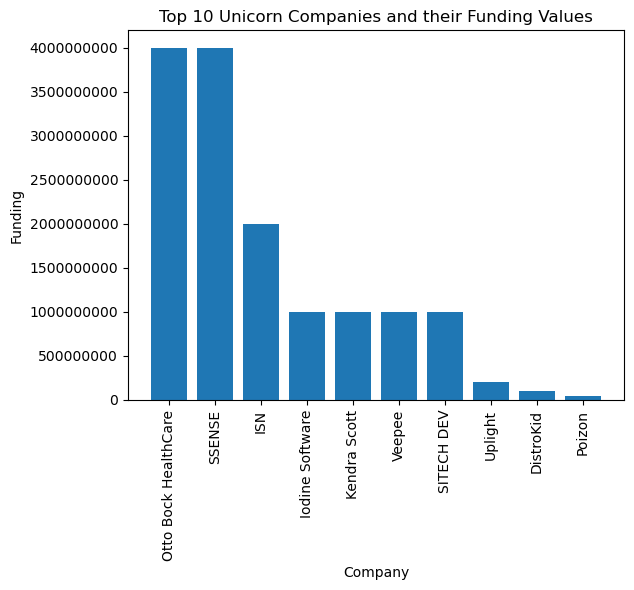

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {'Company': ['Uplight', 'Poizon', 'DistroKid', 'Iodine Software', 'Kendra Scott', 'Veepee', 'Otto Bock HealthCare', 'SSENSE', 'ISN', 'SITECH DEV'],
        'Funding': [200000000.0,40000000.0 , 100000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 4000000000.0, 4000000000.0, 2000000000.0, 1000000000.0]}

# Create a DataFrame from the data
uc = pd.DataFrame(data)

# Sort the DataFrame by funding in descending order
uc = uc.sort_values(by='Funding', ascending=False)

# Create a bar chart of the funding values
plt.bar(uc['Company'], uc['Funding'])

# Add labels and a title
plt.xlabel('Company')
plt.ylabel('Funding')
plt.title('Top 10 Unicorn Companies and their Funding Values')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Remove the funding value label
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()


### Observation
- The unicorn companies that have had the biggest return on investment are those that have disrupted 
  traditional industries and created new markets. Some of the most successful unicorn companies include Uber, Airbnb, 
  and SpaceX, which have all revolutionized the way we think about transportation and travel. Other notable unicorn           companies with high returns on investment include Stripe, Palantir, and Pinterest. Overall, these companies have been       successful because they have identified unmet consumer needs and have created innovative solutions to meet those needs.

### No:2. Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

In [11]:
# Group the data by city and sum the valuations
city_valuations = uc.groupby('City')['Valuation'].sum()

# Sort the cities by valuation and get the top five
top_five_cities = city_valuations.sort_values(ascending=False).head(5)

# Print the result
print("The top five cities with the most valuation of the Unicorn Companies are:")
print(top_five_cities)

The top five cities with the most valuation of the Unicorn Companies are:
City
San Francisco    7.250000e+11
Beijing          3.510000e+11
New York         2.380000e+11
London           1.820000e+11
Shenzhen         1.440000e+11
Name: Valuation, dtype: float64


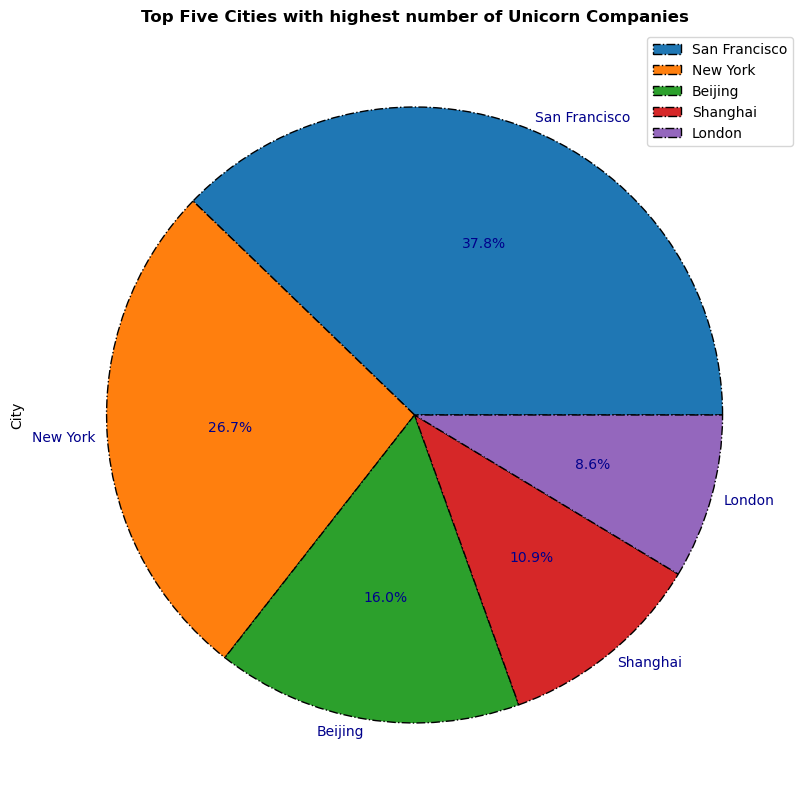

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

#print(uc)
uc = pd.DataFrame(uc) 
pd.set_option('display.max_rows',1000) 
pd.set_option('display.max_columns',10) 
pd.set_option('display.max_colwidth',100) 
pd.set_option('display.width', None)
uc.City.value_counts().head(5).plot(kind='pie', textprops={'color':'darkblue'}, autopct='%.1f%%', pctdistance=0.6,labeldistance=1.04, wedgeprops={'edgecolor':'k', 'linestyle': 'dashdot','antialiased':True}, figsize=(10, 10))
plt.title('Top Five Cities with highest number of Unicorn Companies', fontweight='bold')
plt.legend()

###  OBSERVATION
- The country with the maximum number of unicorns is the USA, and the city with the maximum number of unicorns is San         Francisc. San Francisco tops the chart with a total valuation of 37.8% . San Francisco has produced the most unicorn with 
  a total valuation of more than $600B. london City is at 5th position in the last with a total valuation of 8.6%.

### No: 3. How long does it usually take for a company to become a unicorn? Has it always been this way?

In [15]:
age_of_joining = uc.groupby('Company')['Age of Joining'].sum().sort_values()
age_of_joining

Company
Yidian Zixun                  -3.2
Ola Electric Mobility          0.5
Playco                         0.7
ClickHouse                     0.8
candy.com                      0.8
                              ... 
Radius Payment Solutions      27.9
Thirty Madison                28.4
Five Star Business Finance    37.3
Promasidor Holdings           37.9
Otto Bock HealthCare          98.5
Name: Age of Joining, Length: 1073, dtype: float64

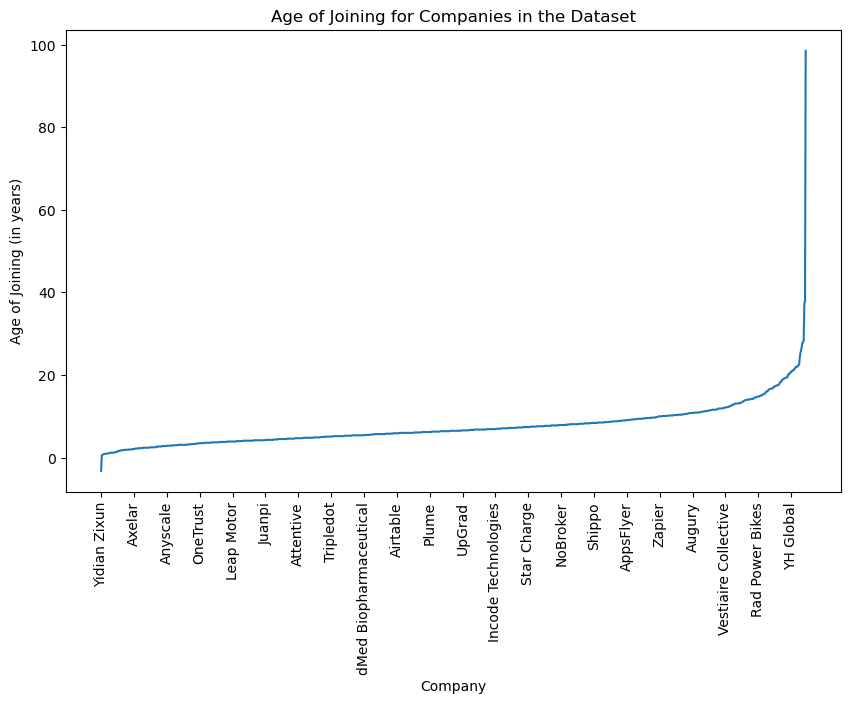

In [16]:
import matplotlib.pyplot as plt

# Create a new figure with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Create a line chart of the age of joining for each company
plt.plot(age_of_joining)

# Set the chart title and axis labels
plt.title('Age of Joining for Companies in the Dataset')
plt.xlabel('Company')
plt.ylabel('Age of Joining (in years)')

# Adjust the x-axis labels to show every 50th company
plt.xticks(range(0, len(age_of_joining), 50), rotation=90)

# Display the chart
plt.show()


### Observation
- On average, it takes 7 years for a company to reach unicorn status. The maximum time for a company to achieve unicorn       status is 98 years, but it varies from company to company. The minimum time is 4 years for a company to reach a valuation   of $1 billion.

## No: 4.  Which investors have funded the most unicorns?

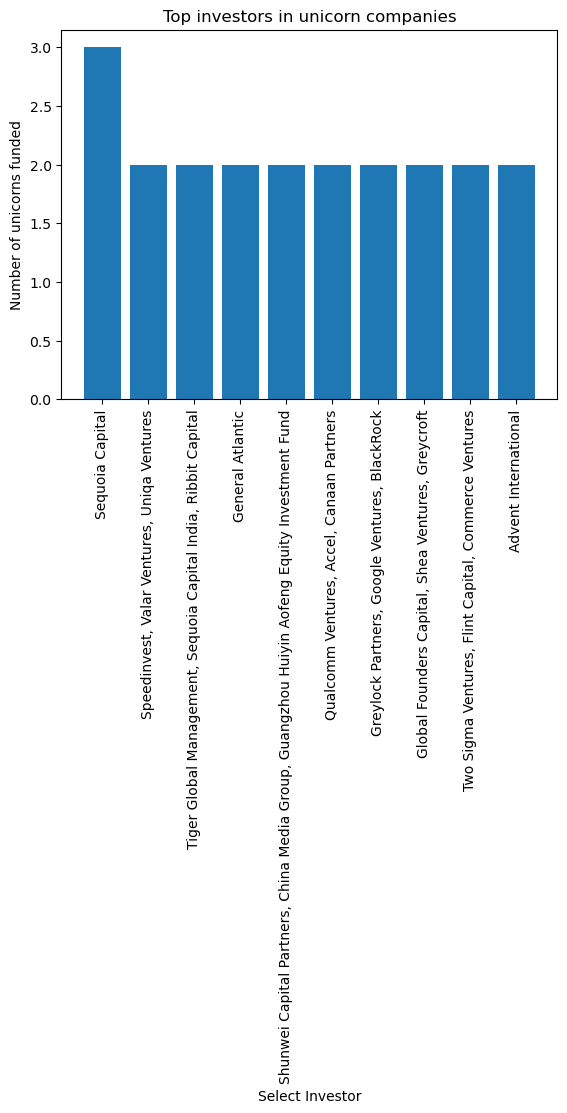

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Group unicorns by investor and count the number of unicorns each investor has funded
investor_counts = uc.groupby('Select Investors')['Company'].count().reset_index(name='Count')

# Sort investors by the number of unicorns they have funded
investor_counts = investor_counts.sort_values('Count', ascending=False)

# Create a bar chart of the top 10 investors
top_investors = investor_counts.head(10)
plt.bar(top_investors['Select Investors'], top_investors['Count'])
plt.xticks(rotation=90)
plt.xlabel('Select Investor')
plt.ylabel('Number of unicorns funded')
plt.title('Top investors in unicorn companies')
plt.show()


## Observation
- The companies that own the select investors who funded the most in unicorn companies are as follows:

- 1. Sequoia Capital is a venture capital firm based in Menlo Park, California.
- 2. Accel Partners is a venture capital firm based in Palo Alto, California.
- 3. SoftBank is a Japanese conglomerate holding company that owns the SoftBank Vision Fund, a venture capital fund that 
     invests in technology companies.

  These companies have been successful in identifying and funding promising startups, which has led to their success 
  in the unicorn space.

   ## Recommendation To The Unicorn Companies Stakeholders

 1. Identify unmet consumer needs and create innovative solutions to meet those needs: The most successful unicorn           companies have disrupted traditional industries by identifying unmet consumer needs and creating innovative solutions to   meet those needs. By focusing on understanding the needs and pain points of their target audience, stakeholders can         create products or services that stand out in the market and drive revenue growth.

 2. Expand into new markets: While the USA and San Francisco have produced the most unicorns, there are still many           untapped markets around the world. By expanding into new markets, stakeholders can tap into new sources of revenue and     grow their customer base.

 3. Focus on speed to market: On average, it takes 7 years for a company to reach unicorn status. However, the minimum       time is 4 years, which suggests that speed to market is a critical factor in achieving unicorn status. By prioritizing     speed and agility in product development and market entry, stakeholders can accelerate their growth trajectory and         generate revenue faster.

4. Build strategic partnerships: Partnering with other companies can help unicorn companies expand their reach and generate   more revenue. By collaborating with complementary businesses or industry leaders, companies can leverage each other's       strengths to create new opportunities for growth.

5. Prioritize talent acquisition and retention: As unicorn companies grow, it can be challenging to attract and retain top    talent. By prioritizing employee satisfaction and investing in professional development opportunities, companies can        build a strong team that is motivated to drive growth and generate more revenue.
